In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(36992, 25)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [7]:
num_cols = ['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,0.143510,1.220602,17.0,0.488856,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,0.157846,-0.845112,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,0.684657,-0.423985,22.0,-0.959453,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,-0.477555,-0.207340,6.0,-0.614355,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,-0.327260,-0.246215,16.0,-0.122756,No,Yes,Yes,Solved,Poor Website,5


In [8]:
df.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [9]:
df['region_category'] = df['region_category'].fillna(pd.Series(np.random.choice(['Town', 'City', 'Village'],  p=[0.45, 0.40, 0.15], size=len(df))))


In [10]:
df.dropna(inplace = True)

In [11]:
encoder = LabelEncoder()
cat_cols = ['gender', 'region_category', 'membership_category']
df['gender'] = encoder.fit_transform(df['gender'])
df['region_category'] = encoder.fit_transform(df['region_category'])
df['membership_category'] = encoder.fit_transform(df['membership_category'])
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,0,XW0DQ7H,2,3,2017-08-17,No,xxxxxxxx,...,0.143510,1.220602,17.0,0.488856,Yes,Yes,No,Not Applicable,Products always in Stock,2
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,0,1F2TCL3,1,2,2016-11-11,Yes,CID12313,...,0.684657,-0.423985,22.0,-0.959453,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,1,VJGJ33N,0,2,2016-10-29,Yes,CID3793,...,-0.477555,-0.207340,6.0,-0.614355,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,0,SVZXCWB,0,2,2017-09-12,No,xxxxxxxx,...,-0.327260,-0.246215,16.0,-0.122756,No,Yes,Yes,Solved,Poor Website,5
5,fffe43004900440036003300320035003300,Leslie Browder,13,1,PSG1LGF,0,1,2016-01-08,No,xxxxxxxx,...,0.477418,-0.791298,24.0,0.182354,Yes,No,Yes,Unsolved,No reason specified,3


(array([ 1050.,  2382.,  2483.,  9373., 18000.]),
 array([-1. ,  0.2,  1.4,  2.6,  3.8,  5. ]),
 <BarContainer object of 5 artists>)

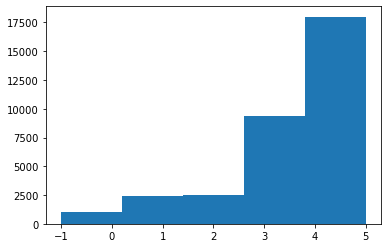

In [13]:
import matplotlib.pyplot as plt
plt.hist(df.churn_risk_score, bins = 5)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'region_category'}>],
       [<AxesSubplot:title={'center':'membership_category'}>,
        <AxesSubplot:title={'center':'days_since_last_login'}>,
        <AxesSubplot:title={'center':'avg_time_spent'}>],
       [<AxesSubplot:title={'center':'avg_transaction_value'}>,
        <AxesSubplot:title={'center':'points_in_wallet'}>,
        <AxesSubplot:title={'center':'churn_risk_score'}>]], dtype=object)

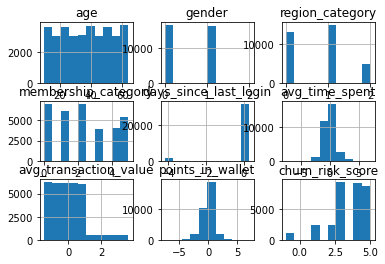

In [14]:
df.hist(bins = 10)

In [16]:
df.skew()

age                     -0.006357
gender                   0.031926
region_category          0.383657
membership_category      0.264797
days_since_last_login   -3.911613
avg_time_spent           0.506957
avg_transaction_value    1.005585
points_in_wallet        -0.082216
churn_risk_score        -1.114433
dtype: float64

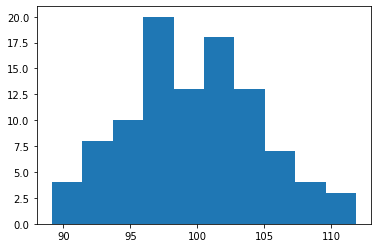

In [24]:
from numpy import exp
from scipy.stats import boxcox
from numpy.random import seed
from numpy.random import randn
random.seed(1)
df = 5*np.random.randn(100)+100
df = exp(df)
df = boxcox(df, 0)
plt.hist(df)
plt.show()